<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/practicaldl/Practical-Deep-Learning-Book/blob/master/code/chapter-2/1-predict-class.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/practicaldl/Practical-Deep-Learning-Book/blob/master/code/chapter-2/1-predict-class.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This code is part of [Chapter 2 - What’s in the Picture: Image Classification with Keras](https://learning.oreilly.com/library/view/practical-deep-learning/9781492034858/ch02.html).

In [1]:
try:
  import google.colab
  IS_COLAB_ENV = True
except:
  IS_COLAB_ENV = False
IS_COLAB_ENV

True

In [ ]:
if IS_COLAB_ENV:
    !pip install tensorflow==2.8.0

# Predict Category of an Image

The image classification task simply answers the question “Does the image contain X” where X can be a cat, dog or any other category/class of objects. In this file, we see the code for predicting categories for an image.

# Import Necessary Libraries - Modules from Keras
- Import all the necessary modules from Keras and Python packages.
- Numpy here gives us the ability to transform matrices
- Matplotlib is used for visualising images.

In [4]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Once we have imported our libraries, we will load and display our test image in a 224x224 resolution.

In [5]:
IMG_PATH = '../../sample-images/cat.jpg'
if IS_COLAB_ENV:
  !curl https://raw.githubusercontent.com/PracticalDL/Practical-Deep-Learning-Book/master/sample-images/cat.jpg --output cat.jpg
  IMG_PATH = 'cat.jpg'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  661k  100  661k    0     0  1361k      0 --:--:-- --:--:-- --:--:-- 1364k


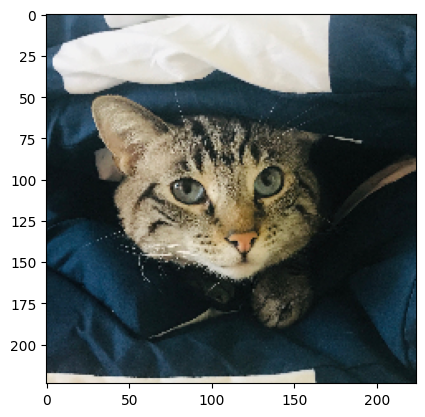

In [6]:
img = image.load_img(IMG_PATH, target_size=(224, 224))
plt.imshow(img)
plt.show()

# Concept of Transfer Learning.
Use a Suitable Pre-Trained Model which has been trained for your dataset or similar domain dataset.
In this case since we are using the generic Cat and Dogs for Classification, we can use the available model - even if it is not hte latest it is okay for learning purpose.

In [8]:
model = tf.keras.applications.resnet50.ResNet50()

Our model has previously been trained only to accept a batch of images. `expand_dims` adds an extra dimension to the array, thereby creating an array of arrays (or a batch of one image).

In [15]:
def fn_predict(p_img_path, p_model):
    img = image.load_img(p_img_path, target_size=(224, 224))          # Load the Image and Resize to standard size as you are loading
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)                    # Do the Scaling and other pre-processing
    prediction = p_model.predict(img_preprocessed)                    # Use a Pre-trained Model and Predict for new Input
    return prediction;

In [16]:
predictions = fn_predict(IMG_PATH, model)

# Decodes the prediction of an ImageNet model.

In [20]:
# Input : predictions - is a Numpy array encoding a batch of predictions.
# Input : Top - Integer, how many top-guesses to return. Defaults to 5.
# Returns : A list of lists of top class prediction tuples (class_name, class_description, score). One list of tuples per sample in batch input.

print(decode_predictions(predictions, top=5)[0])

[('n02123045', 'tabby', 0.5719767), ('n02124075', 'Egyptian_cat', 0.21763477), ('n02123159', 'tiger_cat', 0.060934324), ('n02127052', 'lynx', 0.030217743), ('n03958227', 'plastic_bag', 0.016774928)]


In [ ]:
predictions

## Why not get a Output of 'Cat' Directly ?
### NOTE: ResNet50 was trained on a Finer Granular Set of Felines. There it gives granular Cateogeries

In [22]:
!pwd

/content


In [23]:
IMG_PATH = '/content/testImage01.jpeg'
predictions = fn_predict(IMG_PATH, model)

In [25]:
print(decode_predictions(predictions, top=5)[0])

[('n02504458', 'African_elephant', 0.7139177), ('n02504013', 'Indian_elephant', 0.22803736), ('n01871265', 'tusker', 0.057887614), ('n01704323', 'triceratops', 4.0565916e-05), ('n02408429', 'water_buffalo', 1.2529255e-05)]


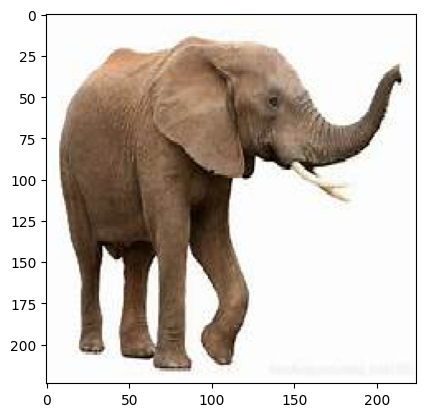

In [26]:
img = image.load_img(IMG_PATH, target_size=(224, 224))
plt.imshow(img)
plt.show()